### INTRODUCTION
This is a capstone project for post graduate programme in data science from Careerera. The data sets is generated to imitate real live scenarios of data collected during covid outbreak.
Discalimer: The dataset used for this analysis is a dummy dataset.

### PROBLEM STATEMENT
This dataset comprises twenty-one columns, encompassing the input column that encapsulates information regarding the severity of COVID for specific individuals. The aim of this project is to build a ML model and train the model with the available features to predict the severity of Covid in individuals. The scale of severity in individuals ranges from
Level 1: Lowest level of covid detected (asymptotic)
Level 2: Mild symptoms*
Level 3: Moderate symptoms* 
Level 4: Moderate to severe symptoms* 
Level 5: Severe symptoms* 
Level 6: Critical symptoms
Level 7: Life threatening conditions


In [ ]:
# import important and useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
import os
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV ,RandomizedSearchCV, cross_val_score
pd.set_option('display.max_columns',None)

In [2]:
# Change the present working directory to the the directory where the data is saved.
os.chdir(r'C:\Users\bkayo\OneDrive\Desktop\Careerera\Careerera_Capstone Project\Health care')

In [3]:
# Load dataset into dataframe
covid = pd.read_csv('Covid_Dataset.csv')
copy = covid.copy() # Make a copy of the original dataframe

## ROUTINE EXPLORATION OF THE DATASET AND FEATURE ENGINEERING

In [4]:
# Load the the first five rows of the dataset
covid.head()

USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  PNEUMONIA  \
0      2             1    1             1  03-05-2020        3          1   
1      2             1    2             1  03-06-2020        3          1   
2      2             1    2             2  09-06-2020        1          2   
3      2             1    1             1  12-06-2020        3          2   
4      2             1    2             1  21-06-2020        3          2   

   AGE  PREGNANT  DIABETES  COPD  ASTHMA  INMSUPR  HIPERTENSION  \
0   65         2         0     0       0        0             1   
1   72         3         0     0       0        0             1   
2   55         3         1     0       0        0             0   
3   53         2         0     0       0        0             0   
4   68         3         1     0       0        0             1   

   OTHER_DISEASE  CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TOBACCO  \
0              0               0        0              0        0   
1              0               0        1              1        0   
2              0               0        0              0        0   
3              0               0        0              0        0   
4              0               0        0              0        0   

   CLASIFFICATION_FINAL  ICU  
0                     3    0  
1                     5    0  
2                     3    1  
3                     7    0  
4                     3    0

In [5]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199999 entries, 0 to 199998
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   USMER                 199999 non-null  int64 
 1   MEDICAL_UNIT          199999 non-null  int64 
 2   SEX                   199999 non-null  int64 
 3   PATIENT_TYPE          199999 non-null  int64 
 4   DATE_DIED             199999 non-null  object
 5   INTUBED               199999 non-null  int64 
 6   PNEUMONIA             199999 non-null  int64 
 7   AGE                   199999 non-null  int64 
 8   PREGNANT              199999 non-null  int64 
 9   DIABETES              199999 non-null  int64 
 10  COPD                  199999 non-null  int64 
 11  ASTHMA                199999 non-null  int64 
 12  INMSUPR               199999 non-null  int64 
 13  HIPERTENSION          199999 non-null  int64 
 14  OTHER_DISEASE         199999 non-null  int64 
 15  CARDIOVASCULAR   

In [6]:
print('The shape of the data is :', covid.shape)
print('The size of the data is :', covid.size)

The shape of the data is : (199999, 21)
The size of the data is : 4199979


In [7]:
# Check to see if any of the columns contains missing value
covid.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

According to the data dictionary, missing values are denoted by 99 in the pneumonia feature and 4 in the pregnant feature, respectively. Further exploration of these features was conducted to determine the number of missing values in each. Additionally, new features was be generated from the date_died column.


In [8]:
covid['PATIENT_DEATH'] = np.where(covid['DATE_DIED']=='9999-99-99', 0,1)

A new column was added. Given that 9999-99-99 serves as a placeholder for individuals with unknown death dates, we established a categorical column where patients who passed away are labeled as 1, and those who did not are labeled as 0.

In [9]:
covid.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
PATIENT_DEATH           0
dtype: int64

In [10]:
# 125 values in the pregnant feature are missing
covid['PREGNANT'].value_counts()

3    104686
2     94004
1      1184
4       125
Name: PREGNANT, dtype: int64

In [11]:
# drop the row whose value is 4 as they represent missing values
covid.drop(covid[covid['PREGNANT'] == 4].index, inplace=True)
copy.drop(copy[copy['PREGNANT'] == 4].index, inplace=True)

In [12]:
# 4756 values in the pneumonia feature are missing
covid['PNEUMONIA'].value_counts()

2     152826
1      42294
99      4754
Name: PNEUMONIA, dtype: int64

We do not intend to drop the missing values in the pneumonia feature considering the number of missing values. Also, considering that Pneumonia and covid are respiratory systems with similar symptoms, this is an important feature in the dataset. Hence,  the missing values were replaced and filled with forward fill method.

In [13]:
# first of 99 is replaced with NAN
covid['PNEUMONIA'] = covid['PNEUMONIA'].replace(99,np.nan)

In [14]:
#  forward fill method was used to fill the missing values 
covid['PNEUMONIA'] = covid['PNEUMONIA'].fillna(method='ffill')

In [15]:
covid.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
PATIENT_DEATH           0
dtype: int64

In [16]:
# The statistical distribution of all the variables in the dataset.
covid.describe()

USMER   MEDICAL_UNIT            SEX   PATIENT_TYPE  \
count  199874.000000  199874.000000  199874.000000  199874.000000   
mean        1.560403       3.900177       1.523760       1.346673   
std         0.496339       0.309972       0.499436       0.475912   
min         1.000000       1.000000       1.000000       1.000000   
25%         1.000000       4.000000       1.000000       1.000000   
50%         2.000000       4.000000       2.000000       1.000000   
75%         2.000000       4.000000       2.000000       2.000000   
max         2.000000       4.000000       2.000000       2.000000   

             INTUBED      PNEUMONIA            AGE       PREGNANT  \
count  199874.000000  199874.000000  199874.000000  199874.000000   
mean        2.577984       1.785305      45.322273       2.517836   
std         0.656131       0.410612      17.263036       0.511401   
min         1.000000       1.000000       0.000000       1.000000   
25%         2.000000       2.000000      32.000000       2.000000   
50%         3.000000       2.000000      44.000000       3.000000   
75%         3.000000       2.000000      57.000000       3.000000   
max         4.000000       2.000000     107.000000       3.000000   

            DIABETES           COPD         ASTHMA        INMSUPR  \
count  199874.000000  199874.000000  199874.000000  199874.000000   
mean        0.172999       0.021924       0.031860       0.018792   
std         0.378247       0.146435       0.175628       0.135790   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

        HIPERTENSION  OTHER_DISEASE  CARDIOVASCULAR        OBESITY  \
count  199874.000000  199874.000000   199874.000000  199874.000000   
mean        0.224832       0.052333        0.025856       0.176871   
std         0.417472       0.222698        0.158707       0.381561   
min         0.000000       0.000000        0.000000       0.000000   
25%         0.000000       0.000000        0.000000       0.000000   
50%         0.000000       0.000000        0.000000       0.000000   
75%         0.000000       0.000000        0.000000       0.000000   
max         1.000000       1.000000        1.000000       1.000000   

       RENAL_CHRONIC        TOBACCO  CLASIFFICATION_FINAL            ICU  \
count  199874.000000  199874.000000         199874.000000  199874.000000   
mean        0.032410       0.076083              4.005839       0.346673   
std         0.177088       0.265131              1.517347       0.475912   
min         0.000000       0.000000              1.000000       0.000000   
25%         0.000000       0.000000              3.000000       0.000000   
50%         0.000000       0.000000              3.000000       0.000000   
75%         0.000000       0.000000              6.000000       1.000000   
max         1.000000       1.000000              7.000000       1.000000   

       PATIENT_DEATH  
count  199874.000000  
mean        0.207115  
std         0.405240  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000

# EXPLORATORY DATA ANALYSIS

Text(0.5, 1.0, 'Distribution of Age by Gender')

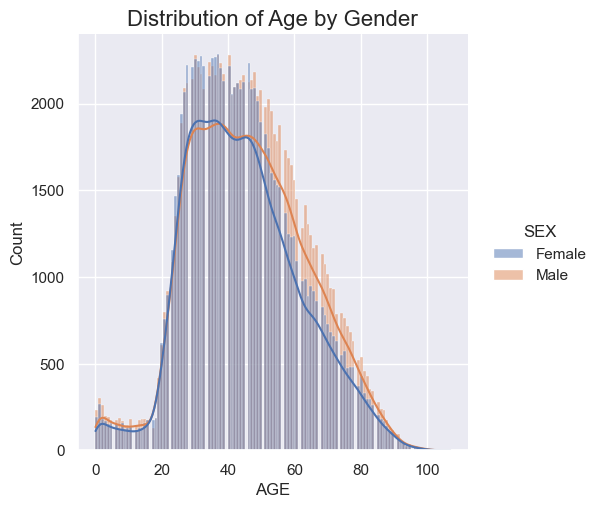

In [17]:
# Fig 1.1 - Distribution of Age by Gender
copy['SEX'] = copy['SEX'].map({1: 'Female', 2: 'Male'})
sns.set(rc={'figure.figsize':(12,8)})
sns.displot(copy, x='AGE', kde=True, hue='SEX')
plt.title('Distribution of Age by Gender', fontsize=16)

As seen in the above graph, the majority of the patients fall in the age range of 20 - 70. Evidently, the graph is left skewed and there exist several techniques that can be used to address the issue of skweness in a dataset. However, none of the technique will be applied at this instance because we intend to use non-parametric ML models.

<Axes: >

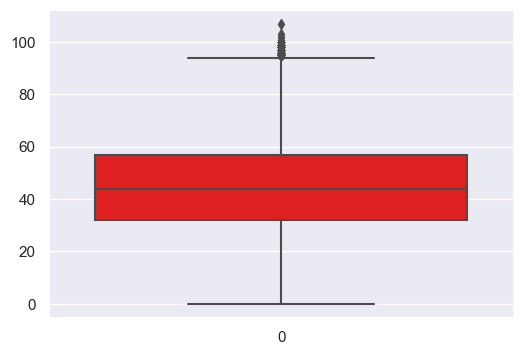

In [18]:
sns.set(rc={'figure.figsize':(6,4)})
sns.boxplot(covid['AGE'],color='red')
# Box plot showing age distribution, a couple of outliers exist and this will be taken 
# care of

<Axes: >

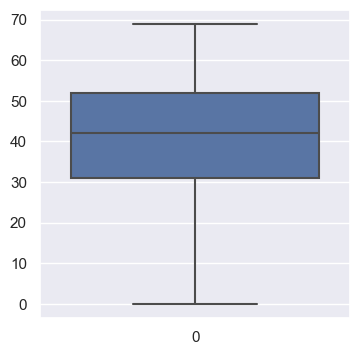

In [19]:
# quantile 1
q1 = copy['AGE'].quantile(0.25)

#quantile 2
q3 = copy['AGE'].quantile(0.75)

# Inter quantile range(IQR)
IQR = q3-q1

#lower_fence
l_fence = q1-IQR*1.5

#upper_fence
u_fence = q1+IQR*1.5

#Plot boxplot without outliers
without_outliers = copy[(copy['AGE']>l_fence)&(copy['AGE']<u_fence)]
plt.figure(figsize=(4,4))
sns.boxplot(without_outliers['AGE'])

As observed in the boxplot illustrating the distribution of age, there are outliers in the dataset. Given the categorical nature of all columns except for Age and Date, the outlier treatment focuses solely on the Age column. This treatment was applied to a copy of the dataset, excluding patients aged 70 and above. Following the outlier treatment, it was determined that patients aged 70 and above are considered outliers.

In the context of the analysis domain, it is not uncommon to encounter patients above the age of 70, and the maximum age in the dataset is 107. These age figures are not unusual in the human population. Moreover, there are a total of 18,085 patients above the age of 70, constituting approximately 9% of the entire dataset. Accepting the results of the outlier treatment would lead to a 9% reduction in the number of rows.

In [20]:
copy[copy['AGE']>70].count()
# There is a total of 18085 patients who are above the age of 70. This represents about 9% of the entire dataset.

USMER                   18084
MEDICAL_UNIT            18084
SEX                     18084
PATIENT_TYPE            18084
DATE_DIED               18084
INTUBED                 18084
PNEUMONIA               18084
AGE                     18084
PREGNANT                18084
DIABETES                18084
COPD                    18084
ASTHMA                  18084
INMSUPR                 18084
HIPERTENSION            18084
OTHER_DISEASE           18084
CARDIOVASCULAR          18084
OBESITY                 18084
RENAL_CHRONIC           18084
TOBACCO                 18084
CLASIFFICATION_FINAL    18084
ICU                     18084
dtype: int64

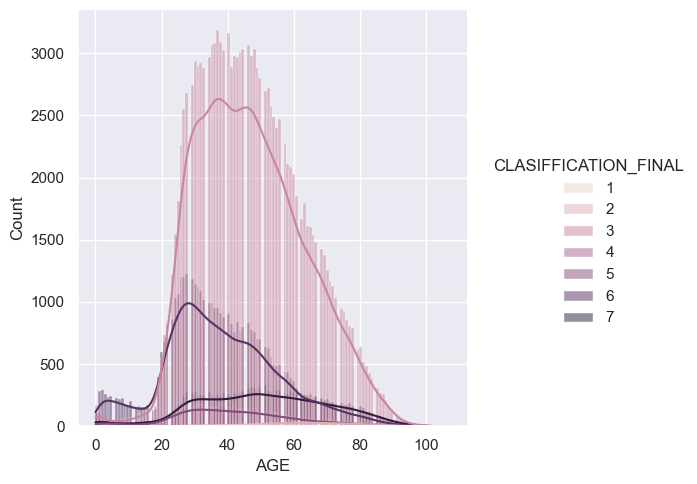

In [21]:
# Distribution of patients age against the severity of covid illness
sns.displot(covid, x='AGE', kde=True, hue='CLASIFFICATION_FINAL')

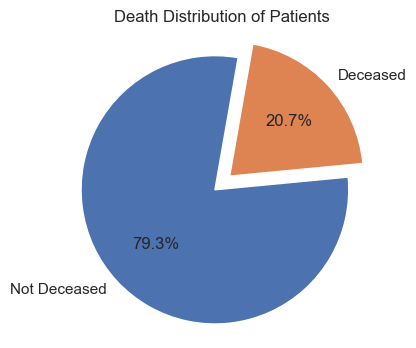

In [22]:
# A Pie chart showing the death distribution of patients
plt.figure(figsize=(4, 4))
labels = ['Not Deceased', 'Deceased']
explode = (0,0.15)
sizes = covid['PATIENT_DEATH'].value_counts()
plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', startangle=80)
plt.axis('equal')
plt.title('Death Distribution of Patients')
plt.show()

<Axes: xlabel='CLASIFFICATION_FINAL', ylabel='count'>

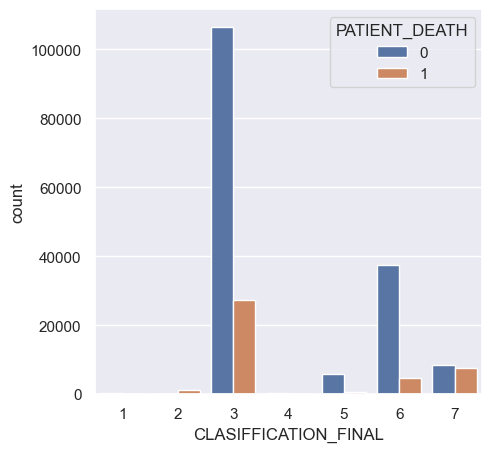

In [72]:
# Relationship between the severity of covid cases and death status
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(covid, x='CLASIFFICATION_FINAL', hue='PATIENT_DEATH')

<Axes: xlabel='CLASIFFICATION_FINAL', ylabel='count'>

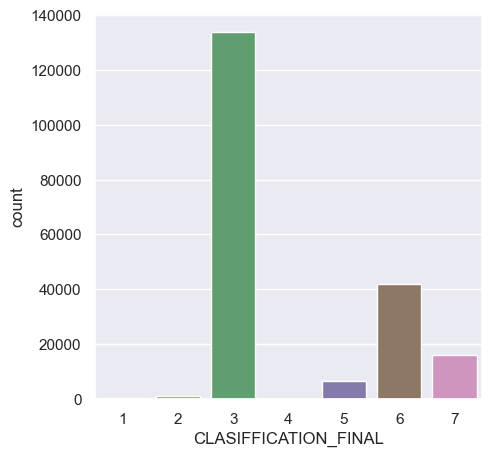

In [24]:
sns.countplot(covid, x='CLASIFFICATION_FINAL')

As seen in the above graph, all patients whose covid condition was life threatening had almost a fifty percent chance of survival.In addition, an issue of imbalanced dataset was observed. Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, i.e one class label has a very high number of observations and the other has a very low number of observations. When the records of a certain class are much more than the other class, our classifier may get biased towards the prediction treating other classes as noise or completely disregard them is a drawback of imbalanced datasets. This would need to be worked before model deployment

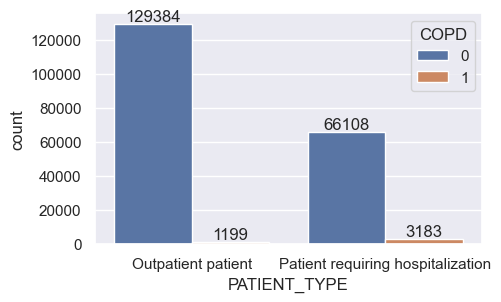

In [25]:
copy['PATIENT_TYPE'] = copy['PATIENT_TYPE'].map({1: 'Outpatient patient', 2: 
'Patient requiring hospitalization'})
sns.set(rc={'figure.figsize':(5,3)})
ax = sns.countplot(copy, x='PATIENT_TYPE', hue= 'COPD' )
for bars in ax.containers:
  ax.bar_label(bars)

In [26]:
copy.columns.tolist()
user = ['USMER',
 'MEDICAL_UNIT',
 'SEX',
 'PATIENT_TYPE',
 'INTUBED',
 'PNEUMONIA',
 'PREGNANT',
 'DIABETES',
 'COPD',
 'ASTHMA',
 'INMSUPR',
 'HIPERTENSION',
 'OTHER_DISEASE',
 'CARDIOVASCULAR',
 'OBESITY',
 'RENAL_CHRONIC',
 'TOBACCO',
 'CLASIFFICATION_FINAL',
 'ICU']
copy_2 = covid[user]

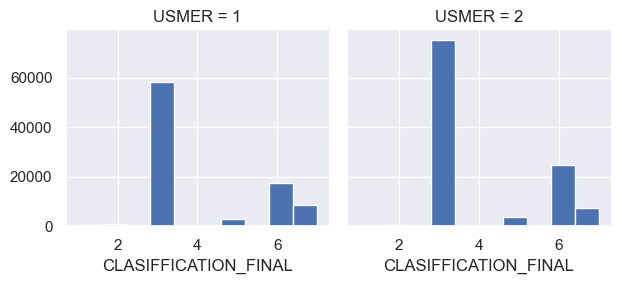

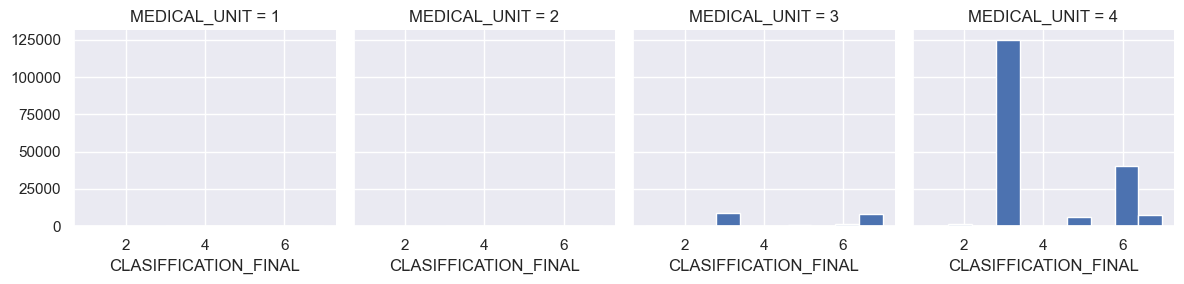

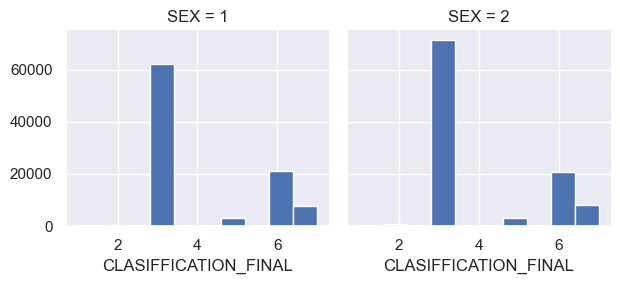

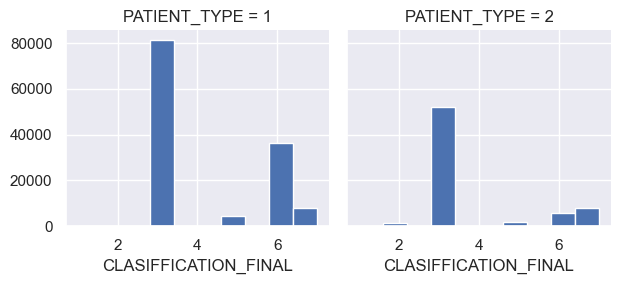

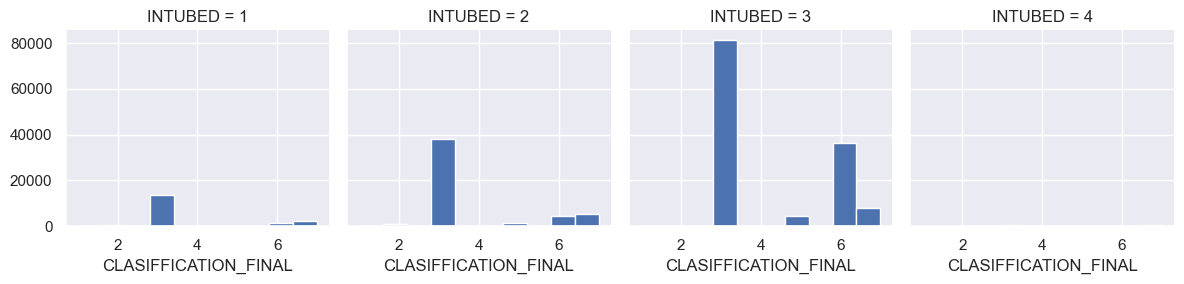

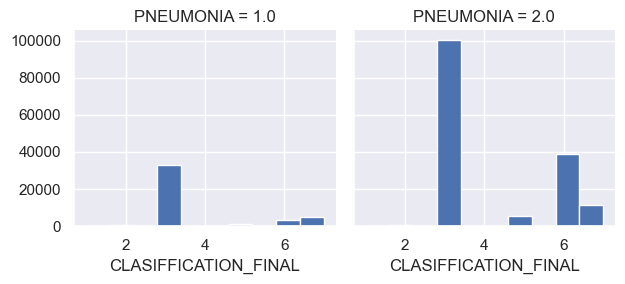

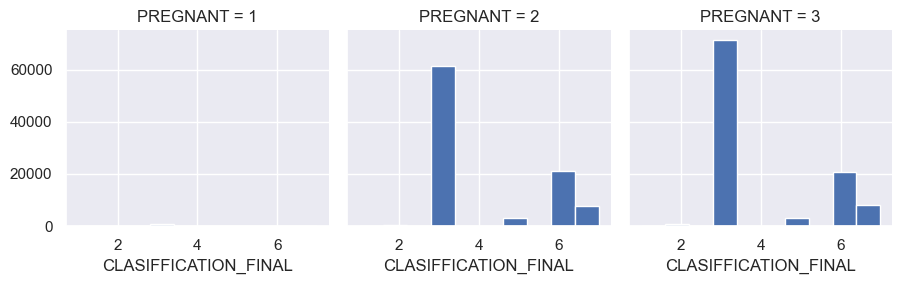

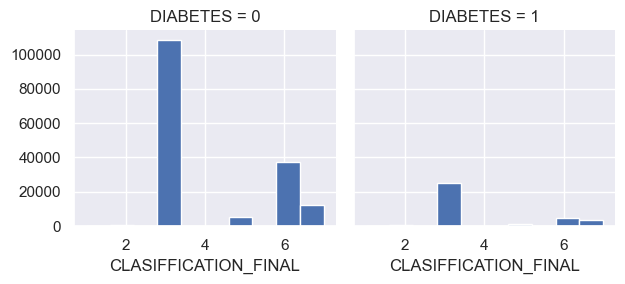

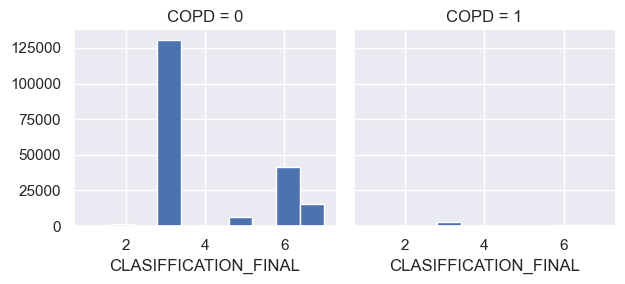

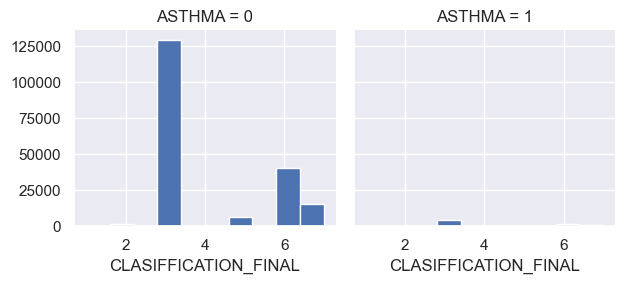

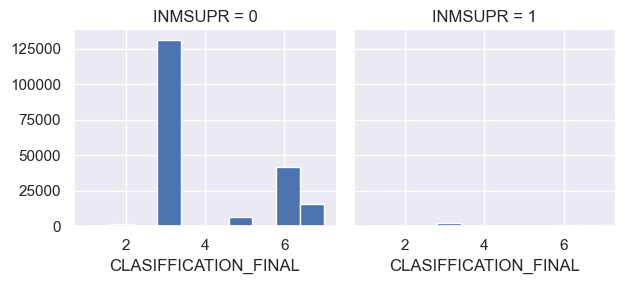

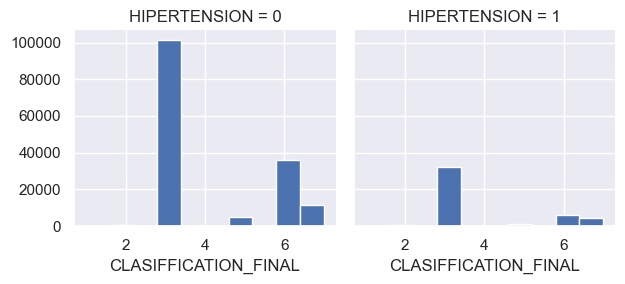

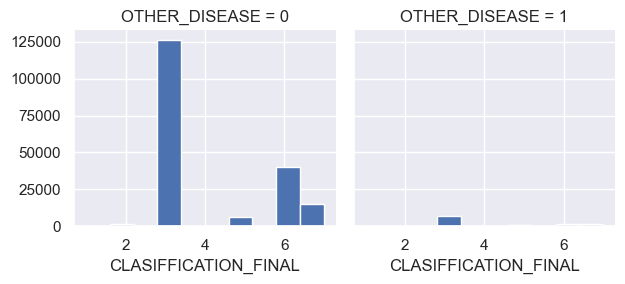

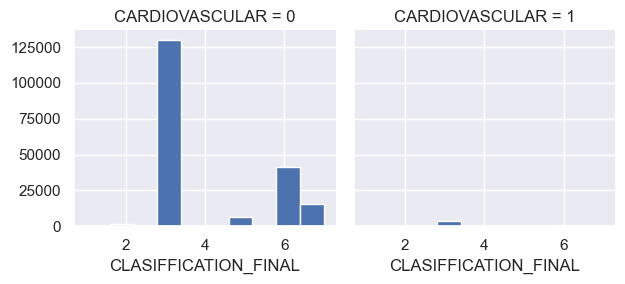

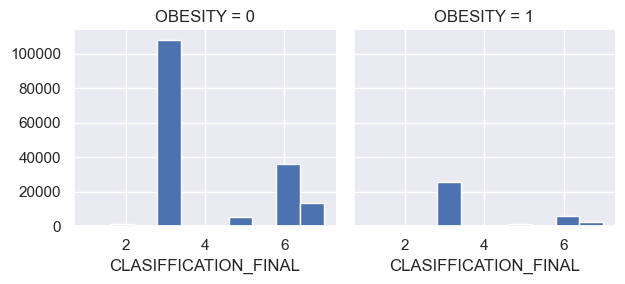

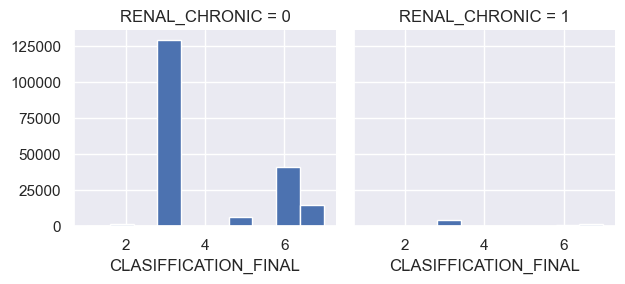

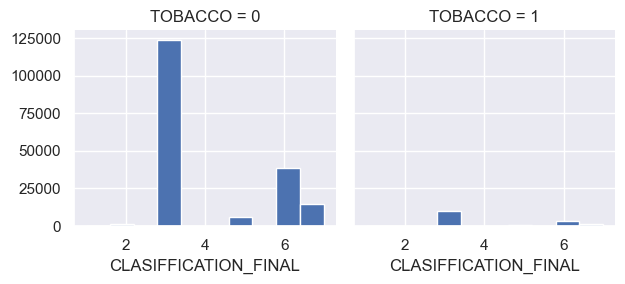

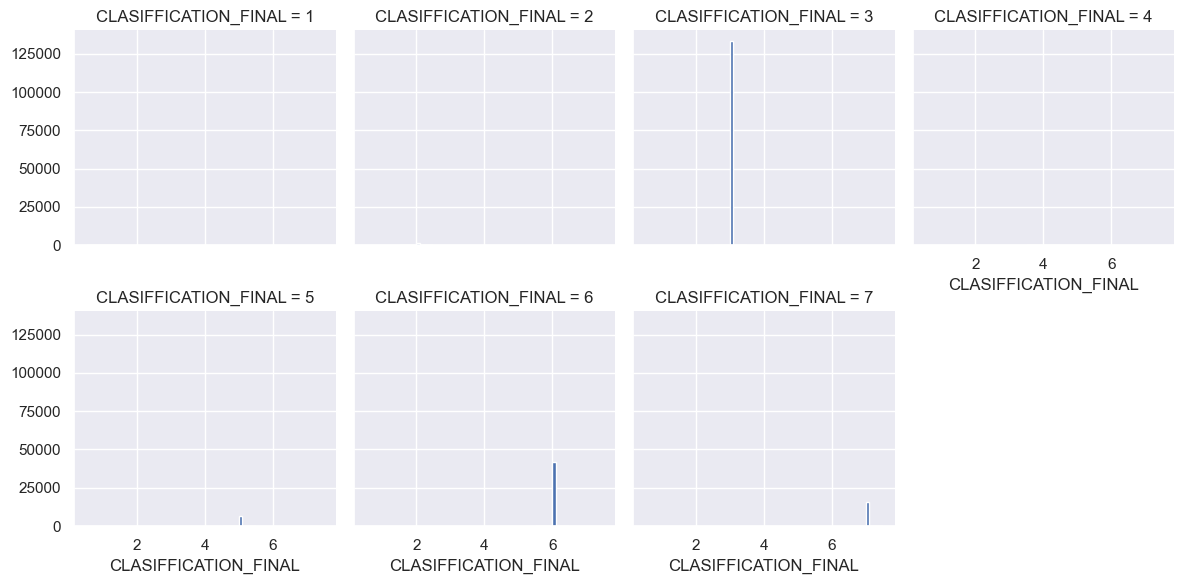

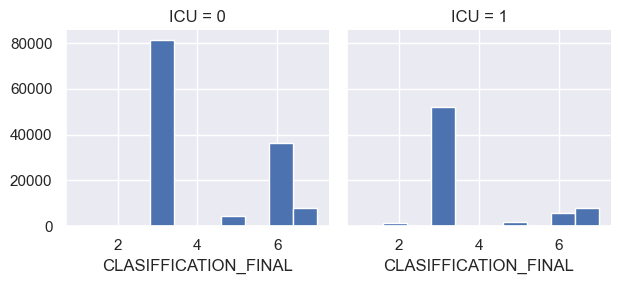

In [27]:
# Distribution of all categorical variables against target variable
for i in copy_2.columns:
  g = sns.FacetGrid(copy_2, col=i, col_wrap=4)
  g.map(plt.hist, "CLASIFFICATION_FINAL")

plt.show()

In [28]:
pd.crosstab([covid.SEX,covid.PREGNANT],covid.INMSUPR,margins=True).style.background_gradient(cmap='viridis')

In [29]:
# The correlation coefficient of all the avriable against target variable
covid.corr()['CLASIFFICATION_FINAL']

C:\Users\bkayo\AppData\Local\Temp\ipykernel_11852\2324161996.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  covid.corr()['CLASIFFICATION_FINAL']


USMER                  -0.012622
MEDICAL_UNIT           -0.224403
SEX                    -0.032253
PATIENT_TYPE           -0.122062
INTUBED                 0.127019
PNEUMONIA               0.103217
AGE                    -0.123039
PREGNANT               -0.029532
DIABETES               -0.048755
COPD                    0.011876
ASTHMA                  0.020592
INMSUPR                 0.027587
HIPERTENSION           -0.047993
OTHER_DISEASE          -0.001156
CARDIOVASCULAR          0.011756
OBESITY                -0.051620
RENAL_CHRONIC           0.015085
TOBACCO                 0.018881
CLASIFFICATION_FINAL    1.000000
ICU                    -0.122062
PATIENT_DEATH           0.016463
Name: CLASIFFICATION_FINAL, dtype: float64

C:\Users\bkayo\AppData\Local\Temp\ipykernel_11852\2260710700.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(covid.corr(),annot=True)


<Axes: >

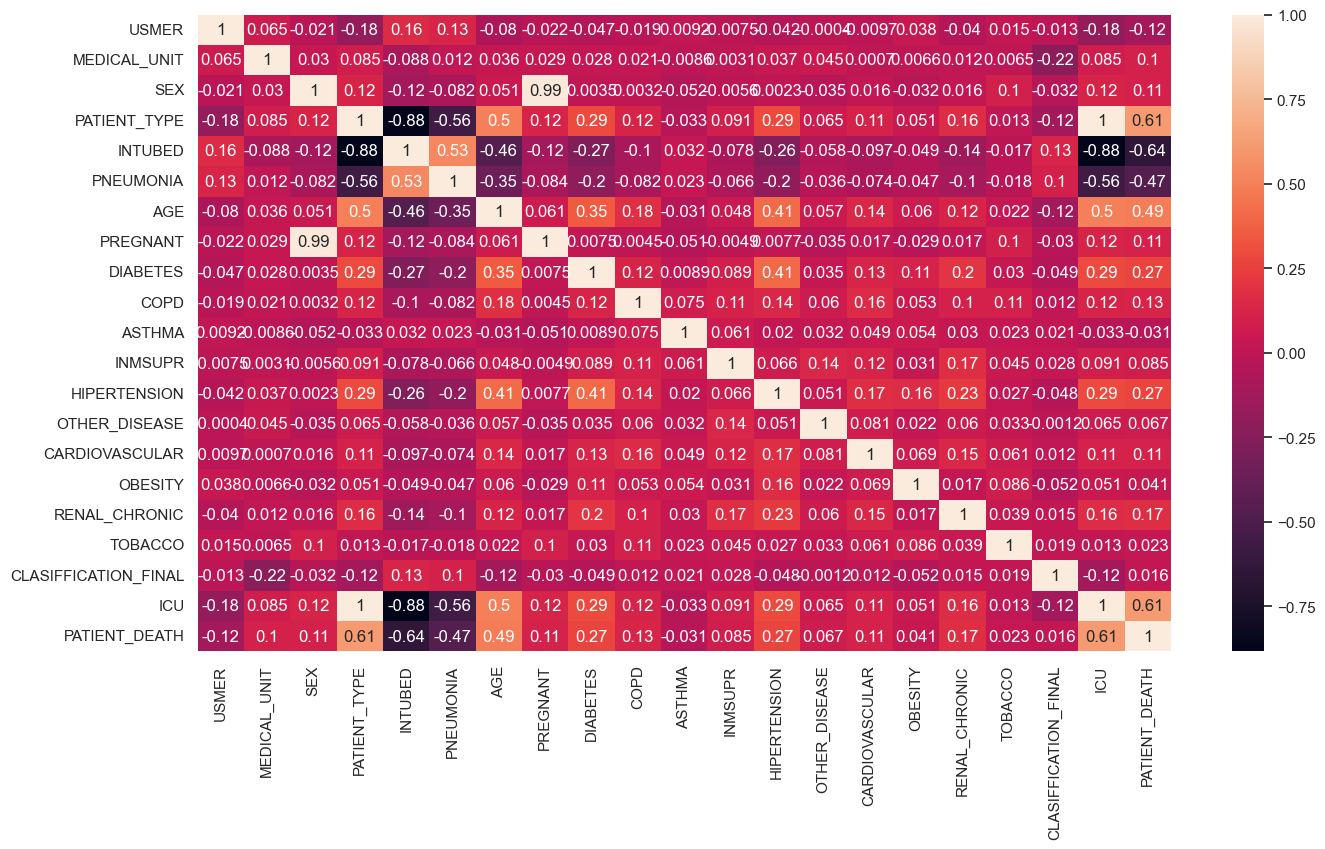

In [30]:
sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.heatmap(covid.corr(),annot=True)

# MODEL BUILDING

In [33]:
# Split variables into input and output
X = covid.drop(['CLASIFFICATION_FINAL', 'DATE_DIED'], axis=1).values
y = covid['CLASIFFICATION_FINAL'].values

In [34]:
# split train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =42)

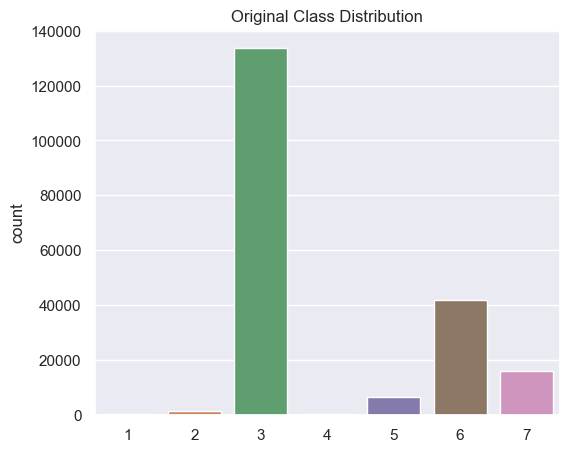

In [35]:
# Visualize the original class distribution to address the issue of imbalanced dataset that was observed during EDA
plt.figure(figsize=(6,5))
sns.countplot(x=y)
plt.title("Original Class Distribution")
plt.show()

In [ ]:
# Calculate the desired number of samples for each class (adjust as needed)
# sampling_strategy_dict = {0: 200, 1: 100, 2: 50, 3: 25, 4: 25, 5: 10, 6: 10}

# Initialize SMOTE with the specified oversampling ratios
#smote = SMOTE(random_state=42)

# Apply SMOTE to the dataset
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# Visualize the original class distribution after applying SMOTE resampling technique
#plt.figure(figsize=(6,5))
#sns.countplot(x=y_train_resampled)
#plt.title("Original Class Distribution")
#plt.show()

In [70]:
# Model 1
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)

dt_pred
print(np.unique(dt_pred, return_counts = True))

# Print accuracy score
print("Accuracy Score:", accuracy_score(y_test, dt_pred))

# Generate and print the classification report
class_report = classification_report(y_test, dt_pred)
print("Classification Report:\n", class_report)

(array([1, 2, 3, 4, 5, 6, 7], dtype=int64), array([   53,   183, 33281,    27,   346,  3002,  3083], dtype=int64))
Accuracy Score: 0.660838023764853
Classification Report:
               precision    recall  f1-score   support

           1       0.04      0.03      0.03        67
           2       0.03      0.02      0.02       246
           3       0.71      0.88      0.79     26774
           4       0.04      0.03      0.03        32
           5       0.14      0.04      0.06      1325
           6       0.44      0.16      0.23      8378
           7       0.43      0.43      0.43      3153

    accuracy                           0.66     39975
   macro avg       0.26      0.23      0.23     39975
weighted avg       0.61      0.66      0.61     39975



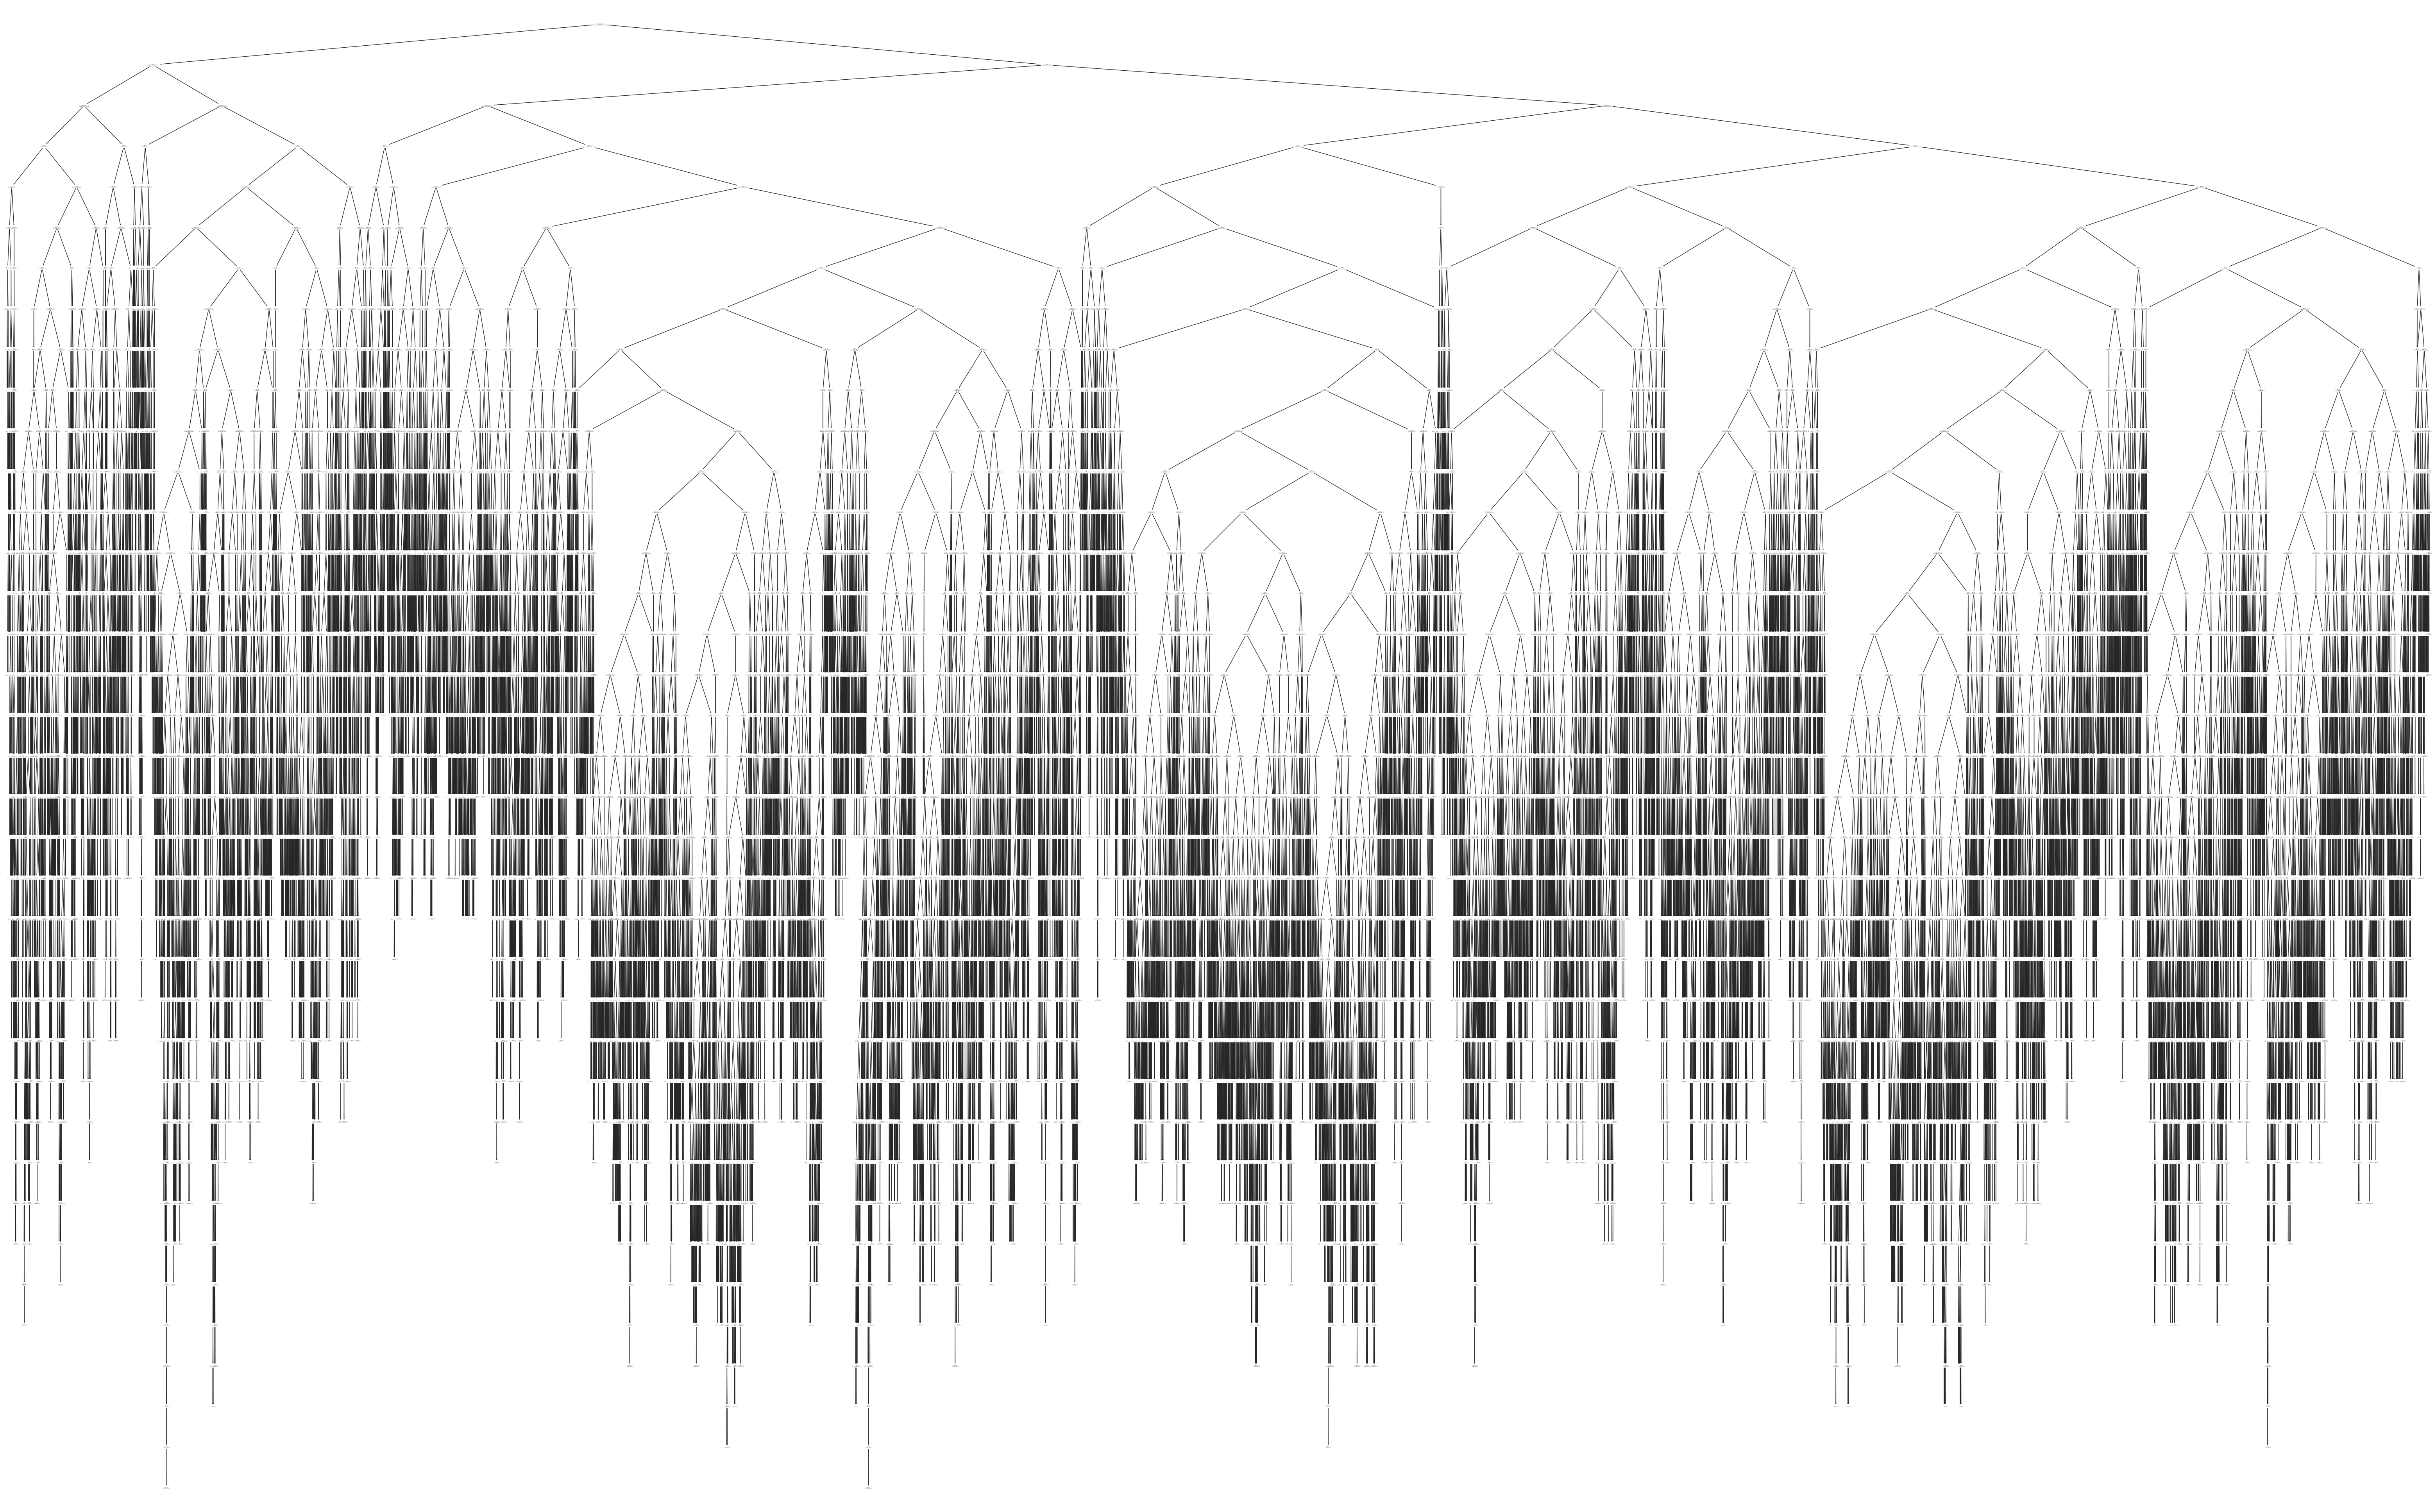

In [71]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 80,50
plot_tree(dt)
plt.show()

In [42]:
# Model 2
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=447)

knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)

# Print accuracy score
print("Accuracy Score:", accuracy_score(y_test, knn_pred))

# Generate and print the classification report
class_report = classification_report(y_test, knn_pred)
print("Classification Report:\n", class_report)

Accuracy Score: 0.6832020012507818
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        67
           2       0.00      0.00      0.00       246
           3       0.69      0.98      0.81     26774
           4       0.00      0.00      0.00        32
           5       0.00      0.00      0.00      1325
           6       0.57      0.14      0.22      8378
           7       0.75      0.01      0.02      3153

    accuracy                           0.68     39975
   macro avg       0.29      0.16      0.15     39975
weighted avg       0.64      0.68      0.59     39975



C:\Users\bkayo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bkayo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bkayo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
# model 3
# Applying bagging classifier
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(
    base_estimator = DecisionTreeClassifier(),
                        n_estimators = 500,
                        max_samples = 0.25,
                        bootstrap = True,
                        random_state = 42
                        )

bag.fit(X_train,y_train)

bag_pred = bag.predict(X_test)

# Print accuracy score
print("Accuracy Score:", accuracy_score(y_test, bag_pred))


# Generate and print the classification report
class_report = classification_report(y_test, bag_pred)
print("Classification Report:\n", class_report)

C:\Users\bkayo\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy Score: 0.6876047529706066
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        67
           2       0.00      0.00      0.00       246
           3       0.71      0.92      0.81     26774
           4       0.00      0.00      0.00        32
           5       0.61      0.03      0.06      1325
           6       0.54      0.15      0.24      8378
           7       0.50      0.46      0.47      3153

    accuracy                           0.69     39975
   macro avg       0.34      0.22      0.23     39975
weighted avg       0.65      0.69      0.63     39975



C:\Users\bkayo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bkayo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bkayo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
# model 4
rf = RandomForestClassifier(n_estimators=500, criterion='entropy', max_depth=10, min_samples_split=35)

rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

# Print accuracy score
print("Accuracy Score:", accuracy_score(y_test, rf_pred))

# Generate and print the classification report
class_report = classification_report(y_test, rf_pred)
print("Classification Report:\n", class_report)

Accuracy Score: 0.6982363977485929
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        67
           2       0.00      0.00      0.00       246
           3       0.71      0.95      0.81     26774
           4       0.00      0.00      0.00        32
           5       0.71      0.03      0.05      1325
           6       0.67      0.13      0.21      8378
           7       0.54      0.42      0.47      3153

    accuracy                           0.70     39975
   macro avg       0.38      0.22      0.22     39975
weighted avg       0.68      0.70      0.63     39975



C:\Users\bkayo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bkayo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bkayo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# HYPERPARAMETER TUNING

A subset of the training set was created for hyper parameter tuning as this process is usually known to be time intensive.

In [45]:
# Specify the fraction of data you want to use for tuning 
tuning_fraction = 0.6

# Create a random sample for tuning
X_tune, _, y_tune, _ = train_test_split(X, y, test_size=tuning_fraction, random_state=42)

In [46]:
# Deciosn Tree
hyp_dt = {'criterion':['gini','entropy'],
          'splitter':['best','random'],
          'max_depth':[None, 2,5,10,15,25,50],
          'min_samples_split':[2,4,8,15,20,35],
          'max_features': ['sqrt', 'log2', None, 0.5]
}

grid_dt = GridSearchCV(dt,hyp_dt,cv=5,  n_jobs=-1, verbose=2,  refit=True , scoring='accuracy')

grid_dt.fit(X_tune,y_tune)

print('best parametrers:',grid_dt.best_params_)

print('best estimator:',grid_dt.best_estimator_)

grid_dt_pred = grid_dt.predict(X_test)

print('The accuracy score:', accuracy_score(grid_dt_pred, y_test))

Fitting 5 folds for each of 672 candidates, totalling 3360 fits
best parametrers: {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_split': 35, 'splitter': 'random'}
best estimator: DecisionTreeClassifier(max_depth=10, min_samples_split=35, splitter='random')
The accuracy score: 0.6953095684803002


In [47]:
# KNN
hyp_knn = {'n_neighbors':[441,443,447,449],
           'weights':['uniform','distance'],
           'p': [1, 2],
           'metric': ['euclidean', 'manhattan', 'chebyshev'],
           }

grid_knn = RandomizedSearchCV(knn,hyp_knn,cv=5, n_jobs=-1, verbose=2,  refit=True, scoring='accuracy')

grid_knn.fit(X_tune,y_tune)

print(grid_knn.best_estimator_)

print(grid_knn.best_params_)

grid_knn_pred = grid_knn.predict(X_test)

print(accuracy_score(grid_knn_pred,y_test))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
KNeighborsClassifier(metric='manhattan', n_neighbors=441, p=1)
{'weights': 'uniform', 'p': 1, 'n_neighbors': 441, 'metric': 'manhattan'}
0.6818761726078799


In [48]:
# Bagging Classifier
hyp_bag = {'n_estimators' : [100, 200, 300, 400, 500],
           'max_samples' : [0.25,0.50,0.75,1.0],
           'bootstrap' : [True, False ] ,
            'random_state' : [0,13,42],
}

grid_bag = RandomizedSearchCV(bag,hyp_bag,cv=5, n_jobs=-1, verbose=2,  refit=True, scoring='accuracy')

grid_bag.fit(X_tune,y_tune)

print(grid_bag.best_estimator_)

print(grid_bag.best_params_)

grid_bag_pred = grid_bag.predict(X_test)

print(accuracy_score(grid_bag_pred,y_test))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\bkayo\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.25,
                  n_estimators=400, random_state=42)
{'random_state': 42, 'n_estimators': 400, 'max_samples': 0.25, 'bootstrap': True}
0.6855784865540963


In [50]:
# Random Forest

hyp_rf = {'criterion':['gini','entropy'],
          'max_depth':[None, 2,5,10,15,25,50],
          'min_samples_split':[2,4,8,15,20,35],
          'max_features': ['sqrt', 'log2', None, 0.5]
}

grid_rf = GridSearchCV(rf,hyp_rf,cv=5,  n_jobs=-1, verbose=2,  refit=True , scoring='accuracy')

grid_rf.fit(X_tune,y_tune)

print('best parametrers:',grid_rf.best_params_)

print('best parametrers:',grid_rf.best_score_)

grid_rf_pred = grid_rf.predict(X_test)

print('The accuracy score:', accuracy_score(grid_rf_pred, y_test))

Fitting 5 folds for each of 336 candidates, totalling 1680 fits
best parametrers: {'criterion': 'gini', 'max_depth': 10, 'max_features': 0.5, 'min_samples_split': 35}
best parametrers: 0.6982576334237918
The accuracy score: 0.6985866166353971


# POST PARAMETER TUNING

In [51]:
model_result = pd.DataFrame({
    'Baseline': [0.6616, 0.6832, 0.6876, 0.6982],
    'Tuned_model': [0.6953, 0.6818, 0.6855, 0.6985]
}, index=['Decision Tree', 'KNN', 'Bagging Classifier', 'Random Forest'])

model_result

Baseline  Tuned_model
Decision Tree         0.6616       0.6953
KNN                   0.6832       0.6818
Bagging Classifier    0.6876       0.6855
Random Forest         0.6982       0.6985

# Voting Classifier

After hyper parameter tuning, the best parameters of each model was fiited on a voting classifier which trains on all the numerous models and predicts an output based on their highest probability of chosen class as the output. 

In [56]:
# Decision Tree Classifier
dt = DecisionTreeClassifier(criterion='gini', max_depth=10, max_features=None,
                            min_samples_split=35, splitter='random')

# K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(weights='uniform', p=1, n_neighbors=441,
                           metric='manhattan')

# Bagging Classifier with Decision Tree base estimator
bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=500,
                        max_samples=0.25, bootstrap=True, random_state=42)

# Random Forest Classifier
rf = RandomForestClassifier(criterion='gini', max_depth=10, max_features=0.5,
                            min_samples_split=35)

In [65]:
voting_clf = VotingClassifier([('dt',dt),( 'knn',knn), ('bag',bag), ('rf',rf)], voting='hard')


In [66]:
voting_clf.fit(X_train,y_train)

C:\Users\bkayo\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(max_depth=10,
                                                     min_samples_split=35,
                                                     splitter='random')),
                             ('knn',
                              KNeighborsClassifier(metric='manhattan',
                                                   n_neighbors=441, p=1)),
                             ('bag',
                              BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                                max_samples=0.25,
                                                n_estimators=500,
                                                random_state=42)),
                             ('rf',
                              RandomForestClassifier(max_depth=10,
                                                     max_features=0.5,
                                                     min_samples_split=35))])

In [67]:
vot_pred = voting_clf.predict(X_test)

In [68]:
accuracy_score(vot_pred, y_test)

0.6964352720450282